In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')
print(os.getcwd())

C:\Users\Houtan\OneDrive\Documents\GitHub\my_grad


In [3]:
import sys
sys.path.append('C:\\Users\\Houtan\\OneDrive\\Documents\\GitHub\\my_grad')

In [4]:
from my_grad.value import Value
from my_grad.neural_network import Library, Neuron, Layer, MLP

In [5]:
# # random seed if want
# np.random.seed(42)
# random.seed(42)

In [10]:
# getting our dataset from scikit learn
# we want binary classification
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1) # make_moons generates two interleaving half circles
                                            # commonly used in test clustering and classification algorithms due to its non-linear decision boundary

# want to make it so y is between -1 and 1, it is intially 0 to 1

y = y*2 - 1

X


array([[ 8.89404968e-01, -5.19726458e-01],
       [ 3.85297774e-01, -4.11478341e-01],
       [ 1.01829603e-01,  2.19704373e-01],
       [ 1.04373788e+00,  3.30136815e-01],
       [ 1.02330986e+00,  1.82725343e-01],
       [-8.42103823e-01,  4.62529138e-01],
       [ 3.35911289e-01,  9.26595939e-01],
       [ 1.46833704e+00, -5.84324442e-01],
       [ 1.87487272e+00,  8.56634561e-02],
       [ 9.81028170e-01,  3.78847189e-01],
       [ 1.25828558e+00, -5.11805187e-01],
       [ 1.77673095e+00, -1.66103952e-01],
       [ 3.89692893e-02,  2.84619260e-01],
       [ 5.59218183e-01,  7.56806173e-01],
       [ 8.03058817e-03,  8.80498859e-01],
       [ 7.25496867e-01,  5.60490946e-01],
       [ 1.87555906e+00,  1.08310355e-02],
       [ 1.68791739e-01,  1.20115953e-01],
       [-6.62895049e-01,  5.55582958e-01],
       [-6.70192730e-02,  1.01161632e+00],
       [ 1.03788701e+00, -4.65855582e-01],
       [-8.11039632e-01,  6.26150476e-01],
       [ 5.52801684e-01, -4.09292966e-01],
       [ 3.

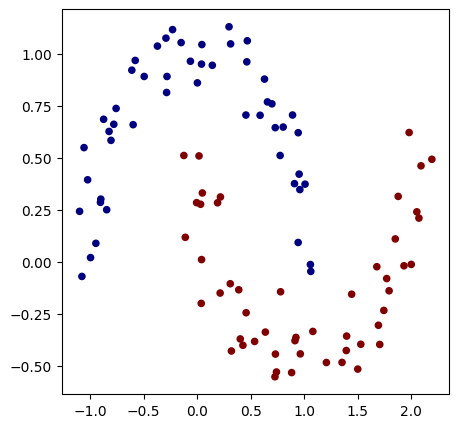

In [7]:
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [8]:
# initialise our model

model = MLP(2, [16, 16, 1], non_lin='tanh')
print(model)
print(f"number of parameters: {len(model.parameters())}")

MLP: [Layer of [TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2)], Layer of [TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16), TanhNeuron(16)], Layer of [TanhNeuron(16)]]
number of parameters: 337


In [16]:
# inputs = [list(map(Value, x_row)) for x_row in X]
# for input in inputs:
#     print([val.data for val in input])

[0.8894049675950035, -0.5197264579331538]
[0.38529777365952783, -0.4114783410265339]
[0.10182960283059564, 0.21970437287870354]
[1.0437378819730958, 0.3301368152567208]
[1.0233098558379725, 0.18272534264629228]
[-0.8421038233525981, 0.46252913794899575]
[0.33591128865113506, 0.9265959390447035]
[1.468337038017898, -0.5843244419738649]
[1.874872716726957, 0.0856634560610669]
[0.9810281704143632, 0.37884718945990725]
[1.258285576728574, -0.5118051869129152]
[1.7767309545231884, -0.16610395185384302]
[0.0389692892564974, 0.28461926004001725]
[0.5592181827825814, 0.7568061733693272]
[0.008030588172045439, 0.8804988593553466]
[0.725496867343592, 0.5604909455828995]
[1.8755590559115922, 0.01083103549466441]
[0.1687917386177481, 0.12011595260040353]
[-0.6628950487998968, 0.5555829579121045]
[-0.06701927297647234, 1.0116163243698615]
[1.0378870093636026, -0.46585558156461737]
[-0.8110396322181742, 0.626150475942216]
[0.5528016840759091, -0.40929296555579986]
[0.33135185082982765, 0.93906090027

In [9]:
# function for the loss function, considering putting in the class but haven't seen any other machine
# learning frameworks do this

def loss(batch_size=None): # could implement batch size method for datasets that are extremely large
    X_b, y_b = X, y

    # need to convert our dataset into our Value objects
    inputs = list(map(Value, x_row) for x_row in X_b)

    # then apply the model to each of these 

    scores = list(map(model, inputs))

    

SyntaxError: incomplete input (1412667379.py, line 4)